This notebook documents the TESS stability analysis simulation used to study the PID model of TESS.

# System model

The base model is as follows:

In [8]:
from IPython.display import Image
!cat model.glm

// TESS Stability Analysis base model

class system
{
    int64 t0;
    double inertia[s];
    double damping[pu];
    double regulation[MW];
    double supply[MW];
    double demand[MW];
    randomvar noise[MW];
    double drift[MW];
    double ramp[MW/h];
    double frequency[Hz];
    double Kp;
    double Ki;
    double Kd;
    double intfreq;
}

class market
{
    double interval[s];
    double price[$/MWh];
    double quantity[MW];
}

class battery
{
    double capacity[MWh];
    double rating[MW];
    double energy[MWh];
    double power[MW];
    double ramp[MW/h];
    double setpoint[MWh];
    double power_ask[$/MWh];
    double power_offer[$/MWh];
}


The base system model has a 20 GW nonimal loading with a 10 s inertial response with 1 pu damping. The system is responding to a 100 MW generation outage.  The system frequency regulation is a PID control with $K_P=0.02$, $K_I=K_P/30$, and $K_D=K_P/10$. The base system model is constructed in GridLAB-D as follows:

// TESS system response to 100MW loss of generation

clock 
{
    timezone "MST+7MDT";
    starttime "2020-01-01 00:00:00 MST";
    stoptime "2020-01-02 00:00:00 MST";
}

#include "model.glm"

object system
{
    name "system";
    inertia 10 s;
    damping 1 pu;
    regulation 0 MW;
    frequency 60 Hz;
    supply 19900 MW;
    demand 20000 MW;
    ramp ${RAMP:-0 MW/h};
    noise "type:normal(0,${NOISE:-0}); refresh:3s";
    drift integrate(noise);
    Kp 0.02;
    Ki ($Kp/30);
    Kd ($Kp/10);
    object recorder
    {
        file "csv/${MODELNAME}.csv";
        interval -1;
        property "frequency,supply,demand,ramp,regulation,drift";
        flush 30;
    };
    on_init python:model.system_init;
}


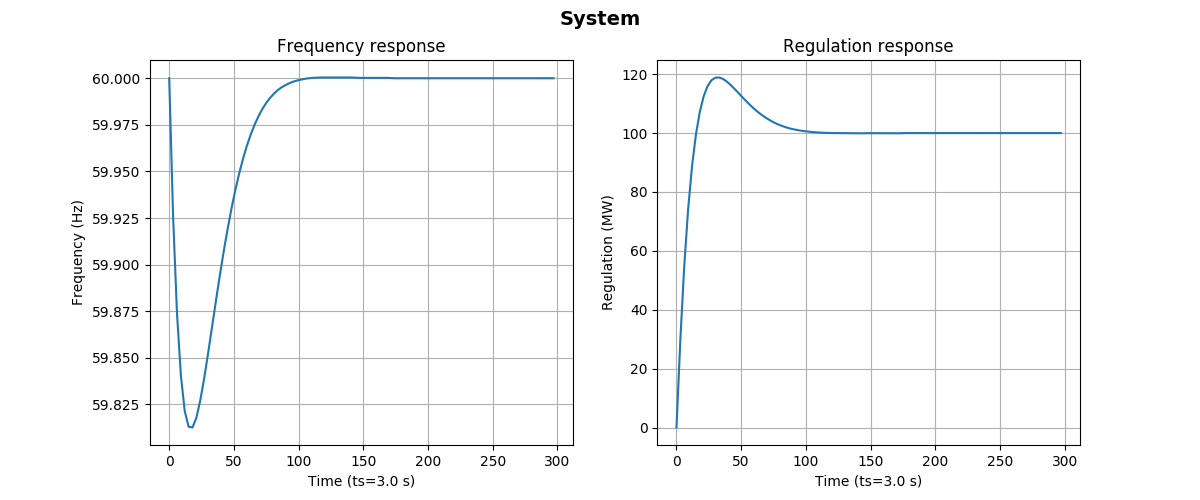

In [9]:
!cat system.glm
!gridlabd system.glm
Image("png/system.png")

In addition, the ramp-up and ramp-down scenarios are simulated using the following models:

// TESS system response to 100MW loss of generation under +100MW/h ramp

#define RAMP=100 MW/h
#include "system.glm"


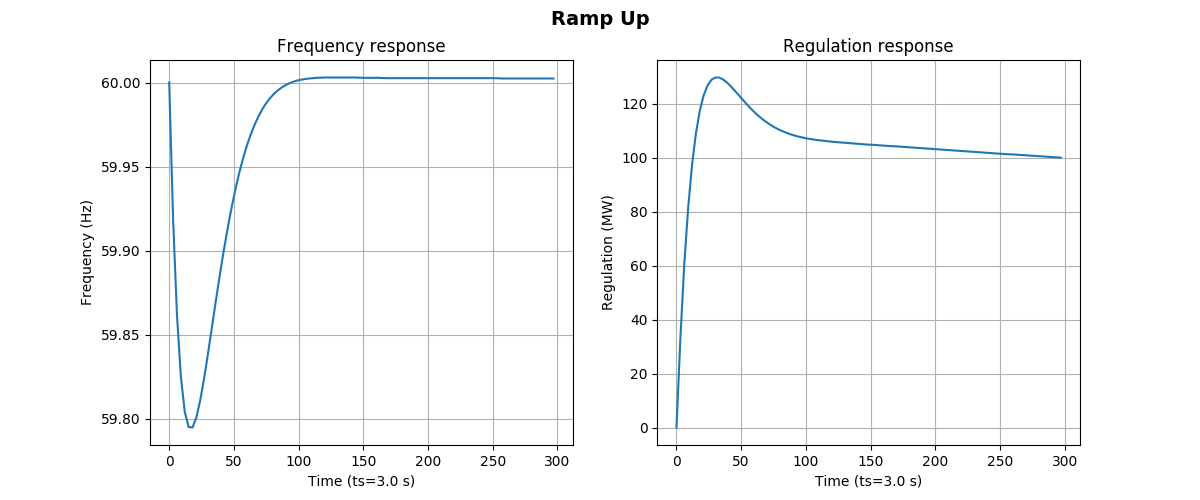

In [10]:
!cat ramp_up.glm
!gridlabd ramp_up.glm
Image("png/ramp_up.png")

// TESS system response to 100MW loss of generation under -100MW/h ramp

#define RAMP=-100 MW/h
#include "system.glm"


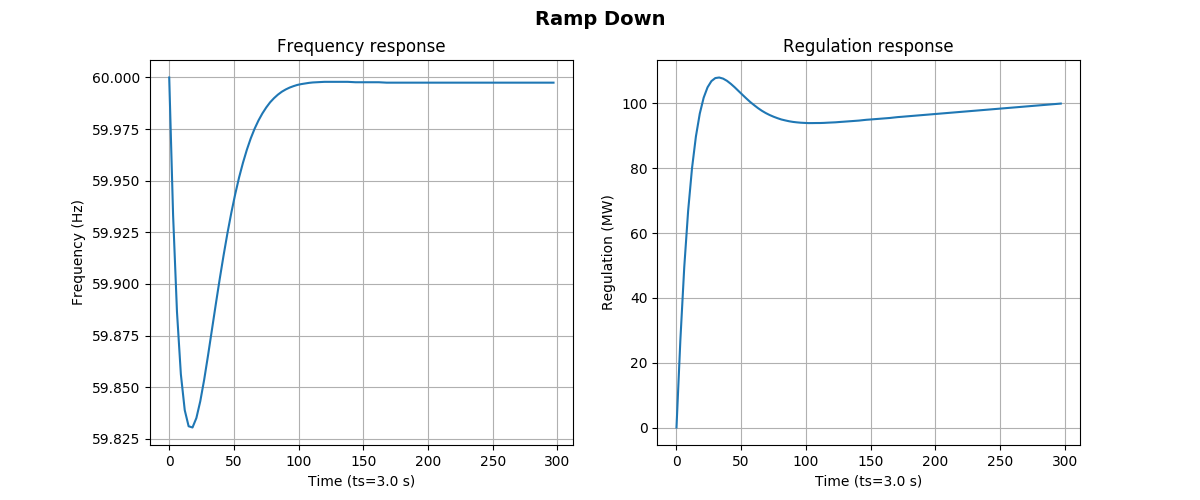

In [11]:
!cat ramp_down.glm
!gridlabd ramp_down.glm
Image("png/ramp_down.png")

Finally, load drift is added using the `NOISE` parameter

// TESS system response to 100MW loss of generation under +100MW/h ramp

#define NOISE=1
#define RAMP=100
#include "system.glm"


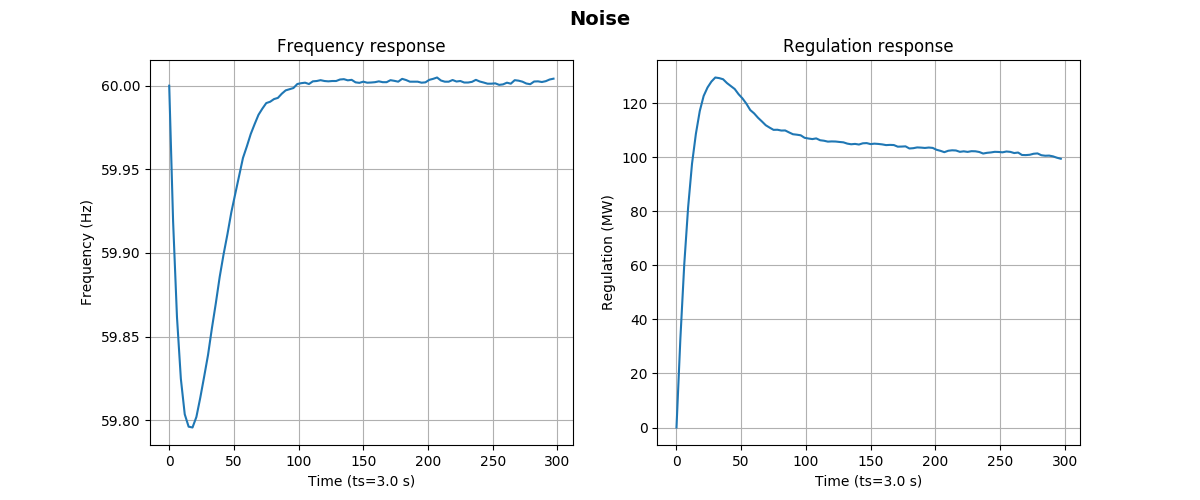

In [12]:
!cat noise.glm
!gridlabd noise.glm
Image("png/noise.png")

# Market model

TODO

# Battery model

TODO